<a href="https://colab.research.google.com/github/rHarris4080/thinkful_25.4_assignment/blob/main/25_4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#25.4 Assignment - Rob Harris
###In this assignment, you'll continue working with the heart disease dataset from the UC Irvine Machine Learning Repository.

1. Produce dendrograms for the heart disease dataset. Use three different linkage methods: complete, average, and ward. Which linkage method do you think produces the most reasonable result?
2. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above, and get ARI and silhouette scores for each of your solutions. Compare the results with each other. Then compare the results with the results from the k-means solution that you implemented in the previous checkpoint's assignment. Which algorithm and setting perform better?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

###Preprocessing:

In [ ]:
# Make sure the number of rows divides evenly into four samples.  Thx Ex.
rows = heartdisease_df.shape[0] - heartdisease_df.shape[0] % 2
df = heartdisease_df.iloc[:rows, :]

# Break into a set of features and a variable for the known outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace some random string values.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)


###Establish standardization and PCA

In [ ]:
# Standarizing the features
scaler = StandardScaler()       # or
X_std = scaler.fit_transform(X) # X_std = StandardScaler().fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

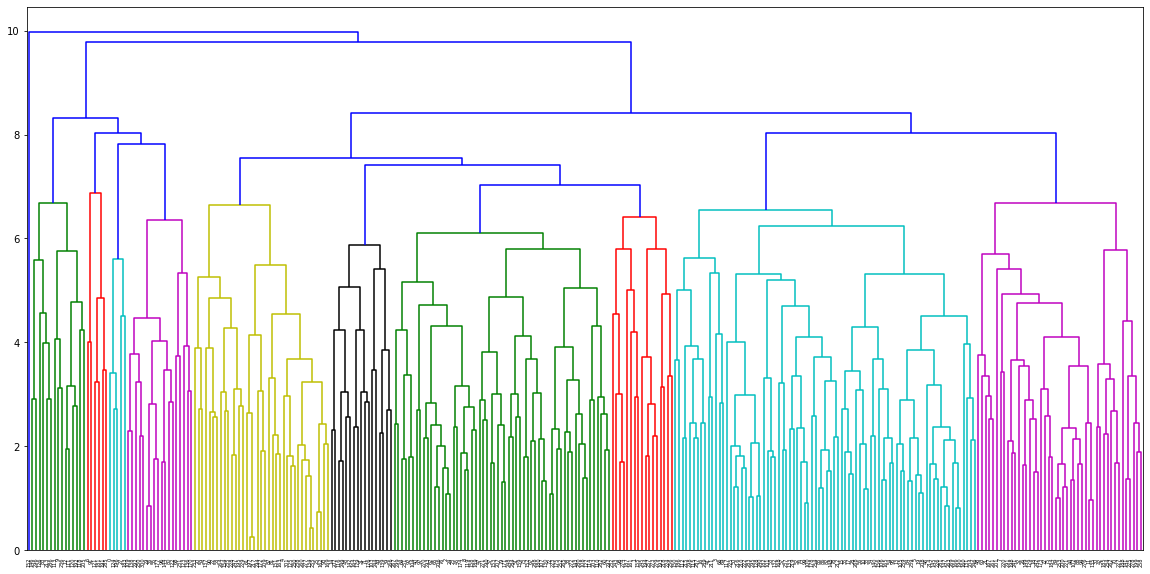

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

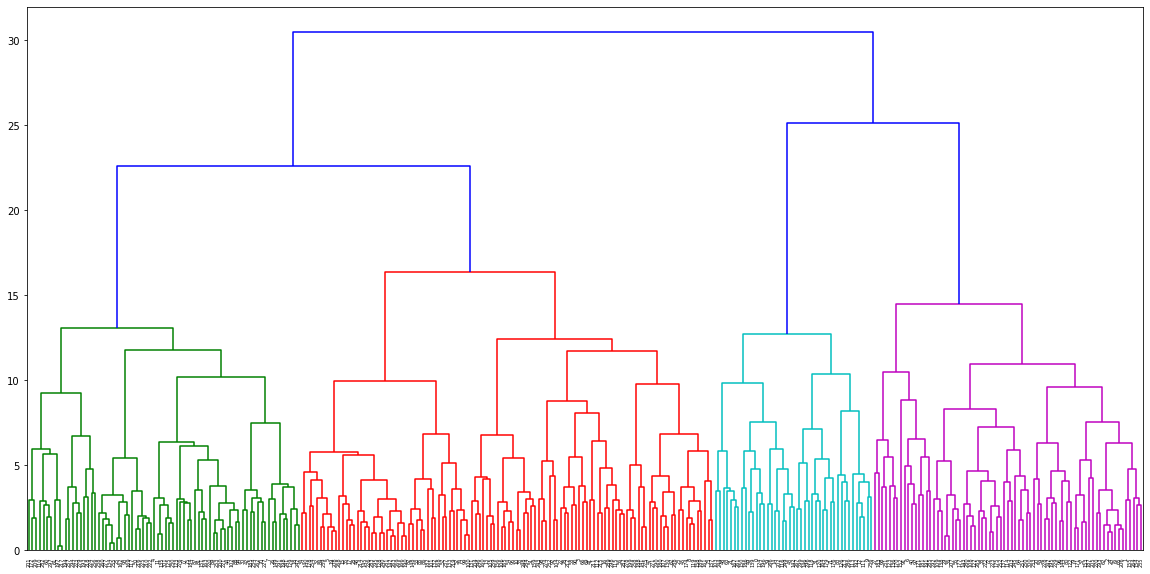

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

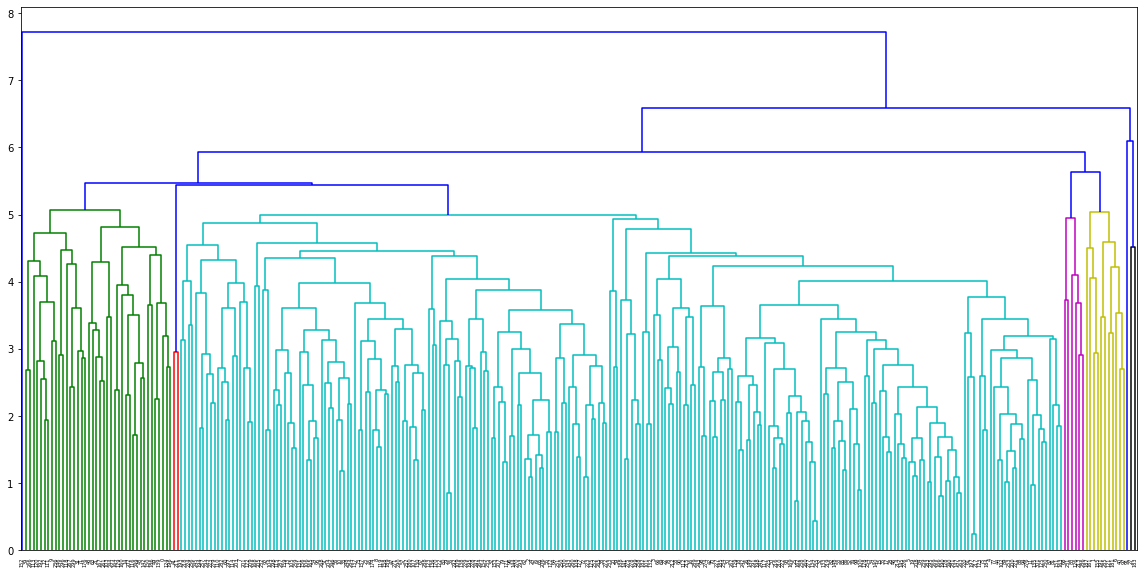

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

## The 'ward' linkage method seems to be the most stable and reasonable technique.

In [ ]:
# Defining the agglomerative clustering with differing linkage techniques"
agg_cluster_comp = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=2)
agg_cluster_ward = AgglomerativeClustering(linkage='ward', affinity='euclidean',  n_clusters=2)
agg_cluster_ave = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=2)

# Fit model
clusters_comp = agg_cluster_comp.fit_predict(X_std)
clusters_ward = agg_cluster_ward.fit_predict(X_std)
clusters_ave = agg_cluster_ave.fit_predict(X_std)

In [ ]:
print('AgglomerativeClustering(n=2) by Linkage:\n')

print("ARI score: 'complete':\t", metrics.adjusted_rand_score(y, clusters_comp))
print("ARI score: 'ward':\t", metrics.adjusted_rand_score(y, clusters_ward))
print("ARI score: 'average':\t", metrics.adjusted_rand_score(y, clusters_ave))

print("\nSilhouette score: 'complete':\t", metrics.silhouette_score(X_std, clusters_comp, metric='euclidean'))
print("Silhouette score: 'ward':\t", metrics.silhouette_score(X_std, clusters_ward, metric='euclidean'))
print("Silhouette score: 'average':\t", metrics.silhouette_score(X_std, clusters_ave, metric='euclidean'))


AgglomerativeClustering(n=2) by Linkage:

ARI score: 'complete':	 0.10233468474116167
ARI score: 'ward':	 0.14457486386986915
ARI score: 'average':	 0.29242115793299467

Silhouette score: 'complete':	 0.07445588349053094
Silhouette score: 'ward':	 0.1377396413078055
Silhouette score: 'average':	 0.14746387683622914


###The linkage method 'average out performed the other two on both the ARI and Silhouette metrics.